# This notebook is an analysis of earthquakes which have occured in Turkey

* Turkey is a seismically active area within the complex zone of collision between the Eurasian Plate and both the African and Arabian Plates. Much of the country lies on the Anatolian Plate, a small plate bounded by two major strike-slip fault zones, the North Anatolian Fault and East Anatolian Fault. The western part of the country is also affected by the zone of extensional tectonics in the Aegean Sea caused by the southward migration of the Hellenic arc. The easternmost part of Turkey lies on the western end of the Zagros fold and thrust belt, which is dominated by thrust tectonics.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print("Libraries have been imported")

Libraries have been imported


In [2]:
data = pd.read_csv('earthquakes_turkey.csv', sep = ',' , encoding='latin-1')

print('Data imported')

Data imported


In [3]:
data.head()

No          Zaman (UTC)  Ref1 Kaynak Aç?klama 1    Enlem  Boylam  Derinlik  \
0   0  2020-01-29 05:10:23     0                    35.1640  27.814     65.10   
1   0  2020-01-29 02:43:13     0                    34.9780  28.001     37.50   
2   0  2020-01-28 21:45:00     0                    35.1750  28.003     53.20   
3   0  2020-01-28 20:10:26     0                    39.0131  27.870      5.08   
4   0  2020-01-28 15:38:35     0                    35.2730  27.947     25.00   

  Sabit Derinlik  Kaynak No 2 Kaynak Aç?klama 2 Tip  Büyüklük  Kaynak No 3  \
0              -            7          AFAD-DDA  Mw       4.1            7   
1              -            7          AFAD-DDA  Mw       4.1            7   
2              -            7          AFAD-DDA  Mw       4.6            7   
3              -            7          AFAD-DDA  Mw       4.7            7   
4              -            7          AFAD-DDA  Mw       5.4            7   

  Kaynak Aç?klama 3 Yer  
0          AFAD-DDA   -  
1          AFAD-DDA   -  
2          AFAD-DDA   -  
3          AFAD-DDA   -  
4          AFAD-DDA   -

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12913 entries, 0 to 12912
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 12913 non-null  int64  
 1   Zaman (UTC)        12913 non-null  object 
 2   Ref1               12913 non-null  int64  
 3   Kaynak Aç?klama 1  12913 non-null  object 
 4   Enlem              12913 non-null  float64
 5   Boylam             12913 non-null  float64
 6   Derinlik           12913 non-null  float64
 7   Sabit Derinlik     12913 non-null  object 
 8   Kaynak No 2        12913 non-null  int64  
 9   Kaynak Aç?klama 2  12913 non-null  object 
 10  Tip                12913 non-null  object 
 11  Büyüklük           12913 non-null  float64
 12  Kaynak No 3        12913 non-null  int64  
 13  Kaynak Aç?klama 3  12913 non-null  object 
 14  Yer                12913 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 1.5+ MB


In [5]:
df = data.rename(columns = { 'Zaman (UTC)' : 'Date', 'Enlem' : 'Latitude', 'Boylam' : 'Longitude', 'Derinlik' : 'Depth',
                 'Tip' : 'Type', 'Büyüklük' : 'Magnitude', 'Yer' : 'Place'})
df.head()

No                 Date  Ref1 Kaynak Aç?klama 1  Latitude  Longitude  \
0   0  2020-01-29 05:10:23     0                     35.1640     27.814   
1   0  2020-01-29 02:43:13     0                     34.9780     28.001   
2   0  2020-01-28 21:45:00     0                     35.1750     28.003   
3   0  2020-01-28 20:10:26     0                     39.0131     27.870   
4   0  2020-01-28 15:38:35     0                     35.2730     27.947   

   Depth Sabit Derinlik  Kaynak No 2 Kaynak Aç?klama 2 Type  Magnitude  \
0  65.10              -            7          AFAD-DDA   Mw        4.1   
1  37.50              -            7          AFAD-DDA   Mw        4.1   
2  53.20              -            7          AFAD-DDA   Mw        4.6   
3   5.08              -            7          AFAD-DDA   Mw        4.7   
4  25.00              -            7          AFAD-DDA   Mw        5.4   

   Kaynak No 3 Kaynak Aç?klama 3 Place  
0            7          AFAD-DDA     -  
1            7          AFAD-DDA     -  
2            7          AFAD-DDA     -  
3            7          AFAD-DDA     -  
4            7          AFAD-DDA     -

In [6]:
df.columns

Index(['No', 'Date', 'Ref1', 'Kaynak Aç?klama 1', 'Latitude', 'Longitude',
       'Depth', 'Sabit Derinlik', 'Kaynak No 2', 'Kaynak Aç?klama 2', 'Type',
       'Magnitude', 'Kaynak No 3', 'Kaynak Aç?klama 3', 'Place'],
      dtype='object')

In [7]:
df.drop(['Sabit Derinlik', 'Kaynak No 2', 'Kaynak Aç?klama 1', 'Kaynak Aç?klama 2' , 'Kaynak No 3', 'Kaynak Aç?klama 3'], axis = 1, inplace = True)
df.head()

No                 Date  Ref1  Latitude  Longitude  Depth Type  Magnitude  \
0   0  2020-01-29 05:10:23     0   35.1640     27.814  65.10   Mw        4.1   
1   0  2020-01-29 02:43:13     0   34.9780     28.001  37.50   Mw        4.1   
2   0  2020-01-28 21:45:00     0   35.1750     28.003  53.20   Mw        4.6   
3   0  2020-01-28 20:10:26     0   39.0131     27.870   5.08   Mw        4.7   
4   0  2020-01-28 15:38:35     0   35.2730     27.947  25.00   Mw        5.4   

  Place  
0     -  
1     -  
2     -  
3     -  
4     -

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12913 entries, 0 to 12912
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         12913 non-null  int64  
 1   Date       12913 non-null  object 
 2   Ref1       12913 non-null  int64  
 3   Latitude   12913 non-null  float64
 4   Longitude  12913 non-null  float64
 5   Depth      12913 non-null  float64
 6   Type       12913 non-null  object 
 7   Magnitude  12913 non-null  float64
 8   Place      12913 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 908.1+ KB


In [9]:
df.isna().sum()

No           0
Date         0
Ref1         0
Latitude     0
Longitude    0
Depth        0
Type         0
Magnitude    0
Place        0
dtype: int64

In [10]:
(df['Place'] == '-').value_counts()

True     12721
False      192
Name: Place, dtype: int64

In [11]:
df[ (df['Place'].str.contains('-')) & (df['Magnitude'] < 4.0)].count()
# all magnitudes are bigger than 4 and since we know latitude and longitude, let's drop place column.

No           0
Date         0
Ref1         0
Latitude     0
Longitude    0
Depth        0
Type         0
Magnitude    0
Place        0
dtype: int64

In [12]:
df.drop(['Place'], axis = 1, inplace = True)
df.head(-5)

No                 Date  Ref1  Latitude  Longitude  Depth Type  \
0       0  2020-01-29 05:10:23     0   35.1640     27.814  65.10   Mw   
1       0  2020-01-29 02:43:13     0   34.9780     28.001  37.50   Mw   
2       0  2020-01-28 21:45:00     0   35.1750     28.003  53.20   Mw   
3       0  2020-01-28 20:10:26     0   39.0131     27.870   5.08   Mw   
4       0  2020-01-28 15:38:35     0   35.2730     27.947  25.00   Mw   
...    ..                  ...   ...       ...        ...    ...  ...   
12903  11  1900-03-03 10:41:00     2   35.0000     33.800  10.00   MS   
12904  10  1900-02-24 00:30:00     2   38.4500     44.870  10.00   MS   
12905   9  1900-02-19 00:30:00     2   39.4600     44.000  10.00   MS   
12906   8  1900-02-10 05:00:00     2   37.8800     27.750  10.00   MS   
12907   7  1900-02-07 00:00:00     1   40.5000     26.600  10.00   MS   

       Magnitude  
0            4.1  
1            4.1  
2            4.6  
3            4.7  
4            5.4  
...          ...  
12903        4.8  
12904        5.2  
12905        4.8  
12906        4.0  
12907        4.3  

[12908 rows x 8 columns]

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute
df['second'] =df['Date'].dt.second

df.head(10)

No                Date  Ref1  Latitude  Longitude  Depth Type  Magnitude  \
0   0 2020-01-29 05:10:23     0   35.1640    27.8140  65.10   Mw        4.1   
1   0 2020-01-29 02:43:13     0   34.9780    28.0010  37.50   Mw        4.1   
2   0 2020-01-28 21:45:00     0   35.1750    28.0030  53.20   Mw        4.6   
3   0 2020-01-28 20:10:26     0   39.0131    27.8700   5.08   Mw        4.7   
4   0 2020-01-28 15:38:35     0   35.2730    27.9470  25.00   Mw        5.4   
5   0 2020-01-28 14:53:51     0   39.0831    27.8295   7.00   Mw        4.1   
6   0 2020-01-28 11:26:14     0   39.1001    27.8411   6.98   Mw        4.8   
7   0 2020-01-27 16:12:00     0   38.3950    39.1333  11.94   Mw        4.2   
8   0 2020-01-26 10:12:17     0   38.4111    39.1530  12.25   Mw        4.1   
9   0 2020-01-26 02:22:45     0   38.2440    38.8013  12.52   Mw        4.3   

   year  month  day  hour  minute  second  
0  2020      1   29     5      10      23  
1  2020      1   29     2      43      13  
2  2020      1   28    21      45       0  
3  2020      1   28    20      10      26  
4  2020      1   28    15      38      35  
5  2020      1   28    14      53      51  
6  2020      1   28    11      26      14  
7  2020      1   27    16      12       0  
8  2020      1   26    10      12      17  
9  2020      1   26     2      22      45

In [14]:
  df.shape

(12913, 14)

In [15]:
df['Magnitude'].value_counts()

4.0    2383
4.1    1866
4.2    1402
4.3    1178
4.5    1027
4.4     969
4.6     882
4.7     668
4.8     562
5.0     375
4.9     338
5.2     224
5.1     216
5.3     154
5.5     127
5.4     117
5.6      76
5.7      57
5.8      52
6.0      47
5.9      34
6.1      26
6.2      23
6.4      16
6.8      15
6.3      13
6.6      11
7.1      11
6.5      11
7.0       7
7.2       7
6.7       5
6.9       4
7.4       3
7.6       2
7.9       2
7.3       1
7.8       1
7.7       1
Name: Magnitude, dtype: int64

In [16]:
df['No'].value_counts()

0        1169
9534        1
1338        1
7481        1
5432        1
         ... 
10864       1
4719        1
6766        1
621         1
8160        1
Name: No, Length: 11745, dtype: int64

In [17]:
df['Type'].value_counts()

mb        7645
MS        2283
Mw        1448
Ml        1304
Md         195
ML          34
md           2
Mwp          1
Ms(BB)       1
Name: Type, dtype: int64

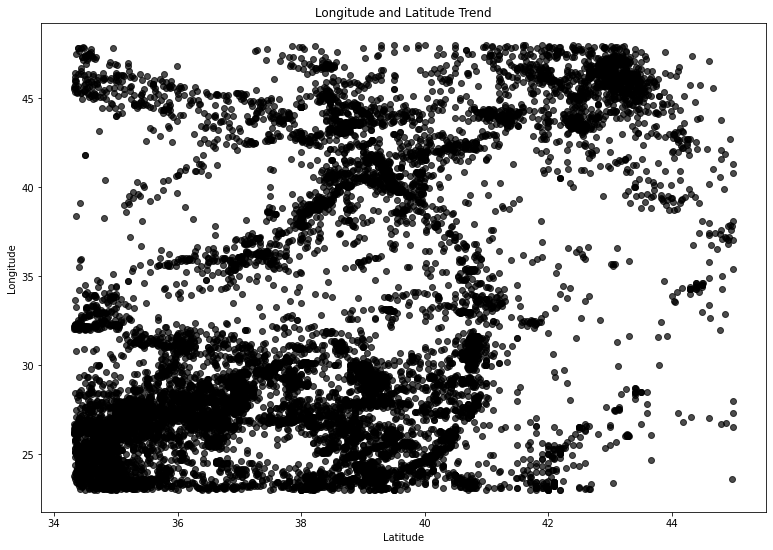

In [18]:
plt.figure(figsize=(13,9))
plt.scatter(x=df['Latitude'],y=df['Longitude'],color='black', alpha = 0.7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude and Latitude Trend',loc='center')
plt.show()

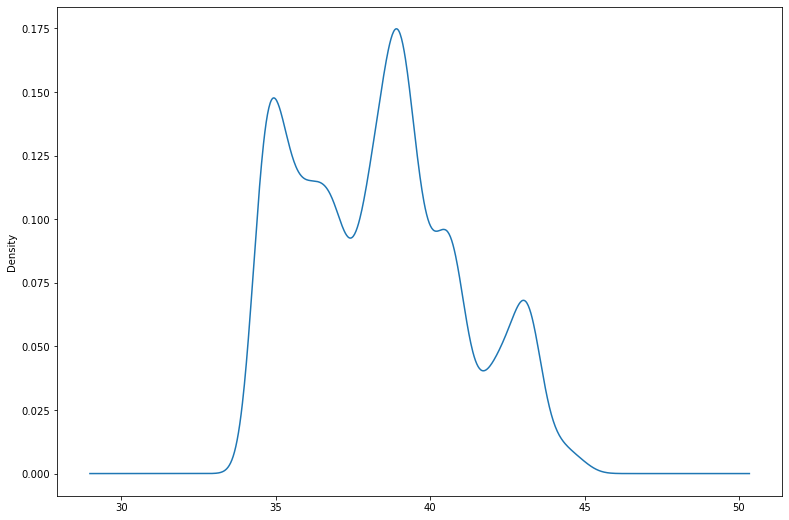

In [19]:
plt.figure(figsize=(13,9))
df['Latitude'].plot(kind='kde')
plt.show()

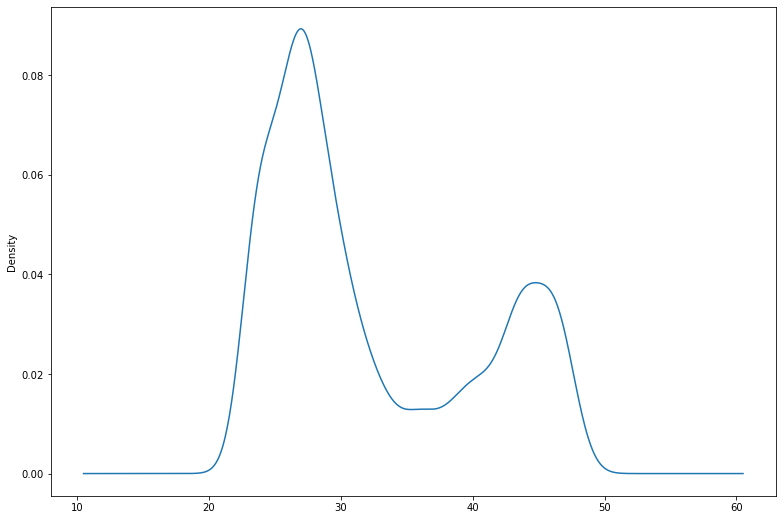

In [20]:
plt.figure(figsize=(13,9))
df['Longitude'].plot(kind='kde')
plt.show()

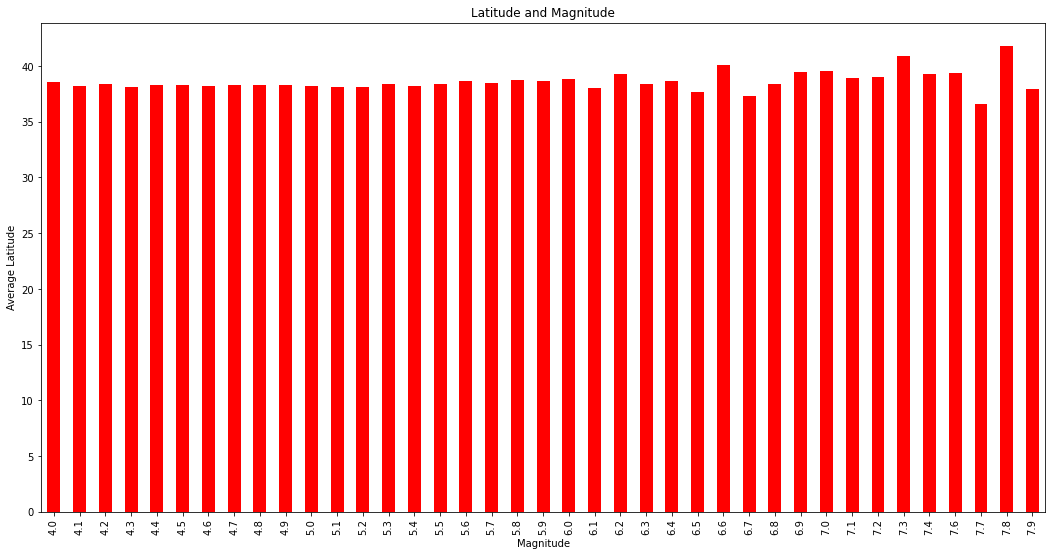

In [21]:
plt.figure(figsize=(18,9))
df.groupby('Magnitude').Latitude.mean().plot(kind='bar',color='red')
plt.title('Latitude and Magnitude')
plt.ylabel('Average Latitude')
plt.show()

* Higher latitude = Bigger magnitude?

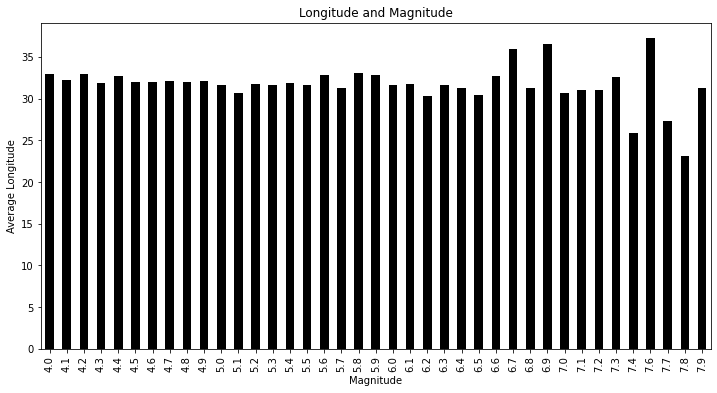

In [22]:
plt.figure(figsize=(12,6))
df.groupby('Magnitude').Longitude.mean().plot(kind='bar',color='black')
plt.title('Longitude and Magnitude')
plt.ylabel('Average Longitude')
plt.show()

* There is not a strong trend that can be said 

<Figure size 2016x864 with 0 Axes>

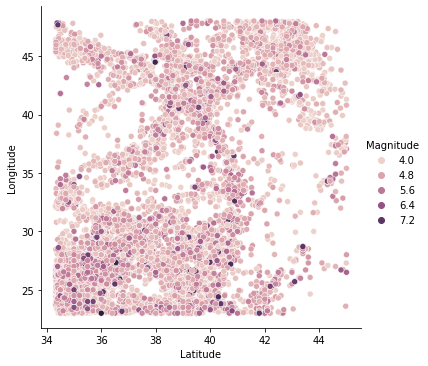

In [23]:
plt.figure(figsize = (28,12))
sns.relplot(x="Latitude", y="Longitude", hue="Magnitude", data=df)
plt.show()

<Figure size 2016x864 with 0 Axes>

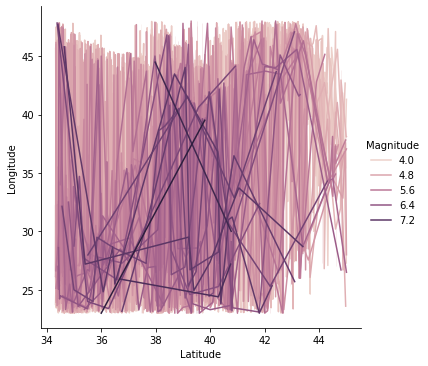

In [24]:
plt.figure(figsize = (28,12))
sns.relplot(x="Latitude", y="Longitude", hue="Magnitude", kind = 'line', data=df)
plt.show()

* Little bit complicated for analysis

In [25]:
df_mg_6 = df[df['Magnitude']> 5.99]
df_mg_6.head()

No                Date  Ref1  Latitude  Longitude  Depth    Type  \
31    0 2020-01-24 17:55:11     0   38.3593    39.0630   8.06      Mw   
113   0 2019-08-08 11:25:30     0   37.8510    29.5840  10.92      Mw   
351   0 2017-11-12 18:18:14     0   34.6420    45.7950  20.00  Ms(BB)   
428   0 2017-07-20 22:31:12     0   36.9740    27.5230   7.80      Mw   
456   0 2017-06-12 12:28:37     0   38.8511    26.2565   6.96      Mw   

     Magnitude  year  month  day  hour  minute  second  
31         6.8  2020      1   24    17      55      11  
113        6.0  2019      8    8    11      25      30  
351        7.2  2017     11   12    18      18      14  
428        6.3  2017      7   20    22      31      12  
456        6.2  2017      6   12    12      28      37

In [26]:
df_mg_6['Magnitude'].value_counts()

6.0    47
6.1    26
6.2    23
6.4    16
6.8    15
6.3    13
7.1    11
6.5    11
6.6    11
7.0     7
7.2     7
6.7     5
6.9     4
7.4     3
7.6     2
7.9     2
7.3     1
7.8     1
7.7     1
Name: Magnitude, dtype: int64

<Figure size 2016x864 with 0 Axes>

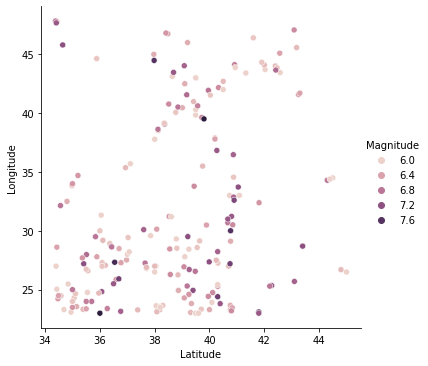

In [27]:
plt.figure(figsize = (28,12))
sns.relplot(x="Latitude", y="Longitude", hue="Magnitude", data=df_mg_6)
plt.show()

Text(0.5, 1.0, 'Year Trend')

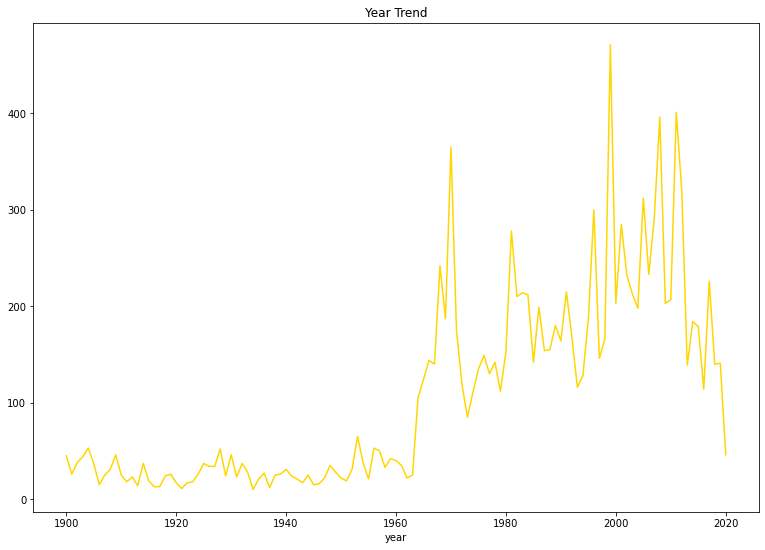

In [28]:
plt.figure(figsize=(13,9))
df.groupby('year').year.count().plot(kind="line",color="gold")
plt.title("Year Trend")

Text(0.5, 1.0, 'Hour Trend')

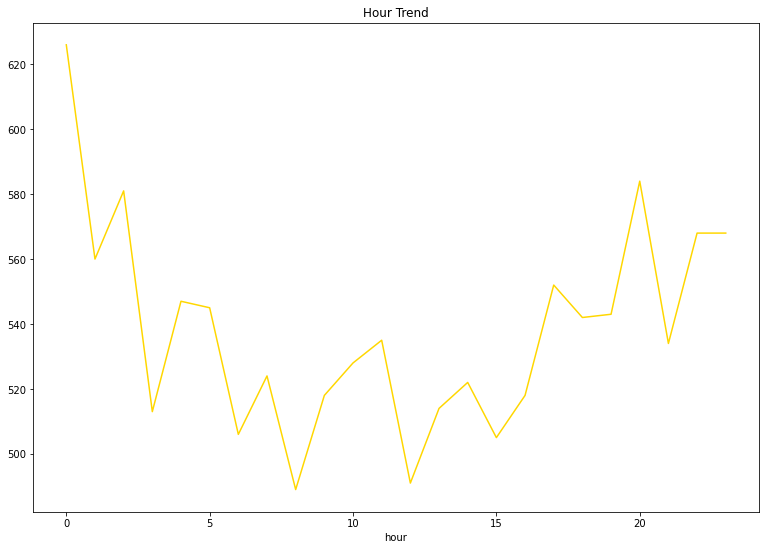

In [29]:
plt.figure(figsize=(13,9))
df.groupby('hour').hour.count().plot(kind="line",color="gold")
plt.title("Hour Trend")

In [30]:
df.columns

Index(['No', 'Date', 'Ref1', 'Latitude', 'Longitude', 'Depth', 'Type',
       'Magnitude', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [31]:
df_new = df[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Type']]
df_new.head()

Latitude  Longitude  Depth  Magnitude Type
0   35.1640     27.814  65.10        4.1   Mw
1   34.9780     28.001  37.50        4.1   Mw
2   35.1750     28.003  53.20        4.6   Mw
3   39.0131     27.870   5.08        4.7   Mw
4   35.2730     27.947  25.00        5.4   Mw

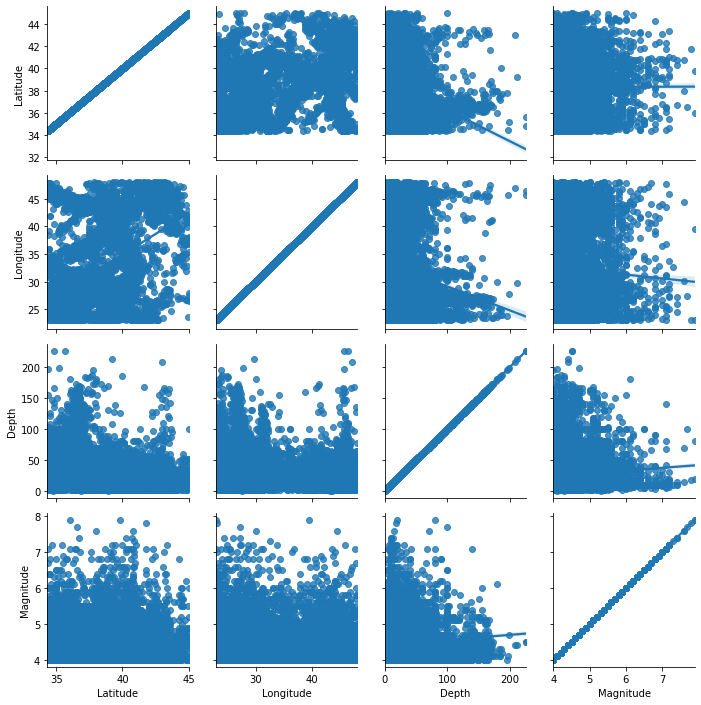

In [32]:
n = sns.PairGrid(df_new)
n.map(sns.regplot)

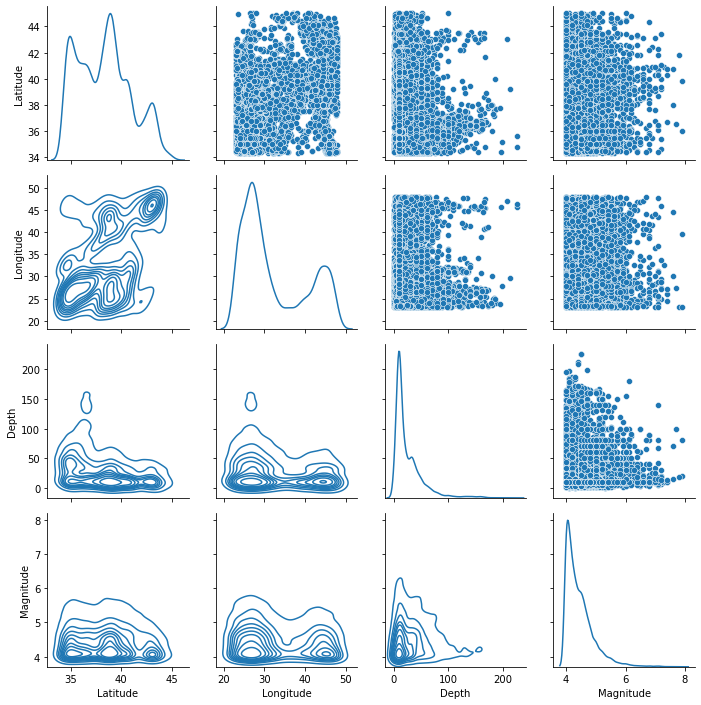

In [33]:
g = sns.PairGrid(df_new, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

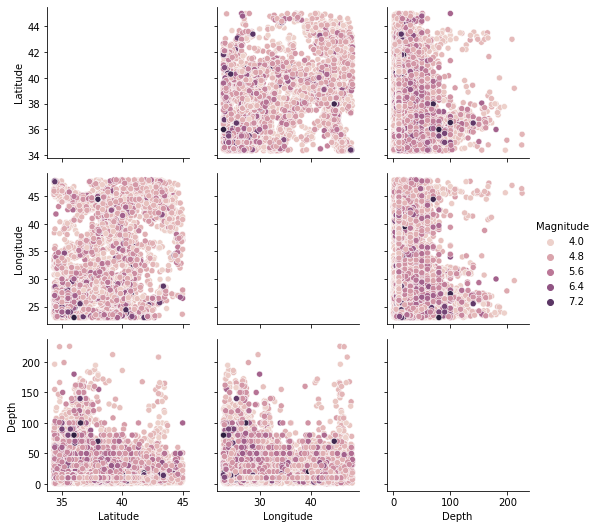

In [34]:
g = sns.PairGrid(df_new, hue="Magnitude")
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [35]:
df_mg_5 = df_new[df_new['Magnitude'] > 5.0]
df_mg_5.head()

Latitude  Longitude  Depth  Magnitude Type
4    35.2730    27.9470  25.00        5.4   Mw
15   38.3740    39.1310  16.40        5.1   Mw
31   38.3593    39.0630   8.06        6.8   Mw
41   39.0488    27.8443  10.35        5.4   Mw
51   35.3641    26.7983  22.63        5.1   Mw

In [36]:
import folium
map_turkey = folium.Map(location=[39.1667, 35.6667], zoom_start=6)
# set color scheme for the clusters

#rainbow = [colors.rgb2hex(i) for i in range(1,30)]


# add markers to the map
markers_colors = []
for lat, lon, mg in zip(df_mg_5['Latitude'], df_mg_5['Longitude'], df_mg_5['Magnitude'] ):
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(map_turkey)

map_turkey

In [37]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

turkey_clustered = df_mg_5.drop(['Type'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(turkey_clustered)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

[3 0 0 3 3 3 3 3 0 3]


(5, 4)

In [38]:
df_mg_5.insert(0,'Cluster Labels', kmeans.labels_)

df_mg_5.head()

Cluster Labels  Latitude  Longitude  Depth  Magnitude Type
4                3   35.2730    27.9470  25.00        5.4   Mw
15               0   38.3740    39.1310  16.40        5.1   Mw
31               0   38.3593    39.0630   8.06        6.8   Mw
41               3   39.0488    27.8443  10.35        5.4   Mw
51               3   35.3641    26.7983  22.63        5.1   Mw

In [39]:
df_mg_5.head(25)

Cluster Labels  Latitude  Longitude  Depth  Magnitude    Type
4                 3   35.2730    27.9470  25.00        5.4      Mw
15                0   38.3740    39.1310  16.40        5.1      Mw
31                0   38.3593    39.0630   8.06        6.8      Mw
41                3   39.0488    27.8443  10.35        5.4      Mw
51                3   35.3641    26.7983  22.63        5.1      Mw
62                3   36.0325    23.4446   6.44        5.9      Mw
82                3   40.8818    28.2140   7.97        5.8      Mw
113               3   37.8510    29.5840  10.92        6.0      Mw
139               0   38.3865    39.1205   8.92        5.2      Mw
158               3   37.4401    29.4335  10.76        5.5      Mw
179               1   35.9788    28.0576  51.33        5.1      Mw
230               1   36.0535    31.2135  36.68        5.2      Mw
250               0   34.6916    45.7921   6.87        5.8      Mw
268               0   41.6500    47.0670  15.00        5.2      Mw
282               0   37.5836    38.5036   9.79        5.1      Mw
335               1   34.8950    45.5930  41.90        5.4      Mw
342               3   37.1146    28.6045  24.46        5.1      Mw
351               0   34.6420    45.7950  20.00        7.2  Ms(BB)
376               0   35.8675    44.7746   4.45        5.2      Mw
390               3   36.9576    27.6236  11.03        5.1      Mw
396               3   34.6571    24.1415   6.61        5.1      Mw
428               3   36.9740    27.5230   7.80        6.3      Mw
439               3   38.8381    26.4360  10.25        5.3      Mw
456               3   38.8511    26.2565   6.96        6.2      Mw
467               3   38.7358    27.8156  11.03        5.1      Mw

In [40]:
from matplotlib import cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[39.1667, 35.6667], zoom_start=8)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, mg, cluster in zip(df_mg_5['Latitude'], df_mg_5['Longitude'], df_mg_5['Magnitude'], df_mg_5['Cluster Labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters    

In [84]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Till%20January%202020/images/k%3D5.PNG")

* Not as I expected, let's analyse every cluster

In [41]:
df_mg_5.reset_index(drop=True, inplace=True)
df_mg_5.head()

Cluster Labels  Latitude  Longitude  Depth  Magnitude Type
0               3   35.2730    27.9470  25.00        5.4   Mw
1               0   38.3740    39.1310  16.40        5.1   Mw
2               0   38.3593    39.0630   8.06        6.8   Mw
3               3   39.0488    27.8443  10.35        5.4   Mw
4               3   35.3641    26.7983  22.63        5.1   Mw

In [42]:
df_mg_5['Cluster Labels'].value_counts()

3    485
1    310
0    285
4    144
2     39
Name: Cluster Labels, dtype: int64

In [59]:
df_mg_5.loc[(df_mg_5['Cluster Labels'] == 0)]

Cluster Labels  Latitude  Longitude  Depth  Magnitude Type
1                  0   38.3740    39.1310  16.40        5.1   Mw
2                  0   38.3593    39.0630   8.06        6.8   Mw
8                  0   38.3865    39.1205   8.92        5.2   Mw
12                 0   34.6916    45.7921   6.87        5.8   Mw
13                 0   41.6500    47.0670  15.00        5.2   Mw
...              ...       ...        ...    ...        ...  ...
1256               0   37.4700    44.7400  10.00        5.2   MS
1257               0   40.8200    42.1200  10.00        5.1   MS
1258               0   40.2800    43.0600  10.00        5.9   MS
1259               0   38.5000    44.9700  10.00        5.1   MS
1260               0   38.4500    44.8700  10.00        5.2   MS

[285 rows x 6 columns]

In [60]:
(df_mg_5['Cluster Labels'] == 0).value_counts()

False    978
True     285
Name: Cluster Labels, dtype: int64

In [67]:
df_mg_5.loc[df_mg_5['Cluster Labels'] == 1].describe()

Cluster Labels    Latitude   Longitude       Depth   Magnitude
count           310.0  310.000000  310.000000  310.000000  310.000000
mean              1.0   37.875532   30.528492   39.427871    5.501290
std               0.0    2.673664    6.502451    7.302085    0.404423
min               1.0   34.338000   23.000000   26.800000    5.100000
25%               1.0   35.447500   25.977500   34.207500    5.200000
50%               1.0   37.755000   28.410000   40.000000    5.400000
75%               1.0   39.750000   33.833000   44.375000    5.700000
max               1.0   44.998900   48.000000   57.000000    7.200000

In [68]:
df_mg_5.loc[df_mg_5['Cluster Labels'] == 2].describe()

Cluster Labels   Latitude  Longitude       Depth  Magnitude
count            39.0  39.000000  39.000000   39.000000  39.000000
mean              2.0  36.590341  27.142623  136.682051   5.361538
std               0.0   0.548749   2.174989   18.790897   0.391768
min               2.0  35.060000  23.310000  109.000000   5.100000
25%               2.0  36.400000  26.275000  120.000000   5.100000
50%               2.0  36.604000  26.919000  140.000000   5.200000
75%               2.0  36.815000  27.885000  150.000000   5.400000
max               2.0  38.050000  31.720000  180.000000   7.100000

In [69]:
df_mg_5.loc[df_mg_5['Cluster Labels'] == 3].describe()

Cluster Labels    Latitude   Longitude       Depth   Magnitude
count           485.0  485.000000  485.000000  485.000000  485.000000
mean              3.0   38.487823   27.123388   13.287856    5.550515
std               0.0    2.292176    2.973659    5.524205    0.521030
min               3.0   34.378400   23.000000    1.000000    5.100000
25%               3.0   36.639000   24.700000   10.000000    5.200000
50%               3.0   38.760000   26.930000   11.030000    5.400000
75%               3.0   40.422000   29.000000   15.700000    5.700000
max               3.0   44.500000   34.800000   27.000000    7.800000

In [70]:
df_mg_5.loc[df_mg_5['Cluster Labels'] == 4].describe()

Cluster Labels    Latitude   Longitude       Depth   Magnitude
count           144.0  144.000000  144.000000  144.000000  144.000000
mean              4.0   36.835245   29.657583   77.055556    5.574306
std               0.0    1.942380    5.939971   13.943742    0.564169
min               4.0   34.387700   23.000000   58.500000    5.100000
25%               4.0   35.591450   25.992500   65.300000    5.200000
50%               4.0   36.218500   27.383000   76.250000    5.400000
75%               4.0   37.657500   31.485425   83.000000    5.825000
max               4.0   45.000000   47.800000  106.700000    7.900000

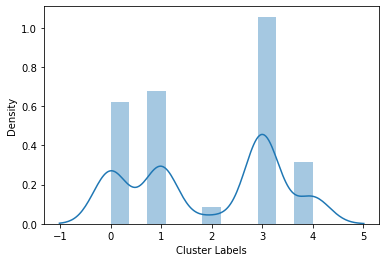

In [65]:
sns.distplot(df_mg_5["Cluster Labels"])

In [74]:
df_mg_5['Type'].value_counts()

MS        766
Mw        375
mb        113
Ml          6
ML          1
Ms(BB)      1
md          1
Name: Type, dtype: int64

In [75]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

turkey_clustered = df_mg_5.drop(['Type'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(turkey_clustered)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers.shape

[0 0 0 0 0 0 0 0 0 0]


(3, 5)

In [78]:
df_k_3 = df_new[df_new['Magnitude'] > 5.0]
df_k_3.insert(0,'Cluster Labels', kmeans.labels_)

df_k_3.head()

Cluster Labels  Latitude  Longitude  Depth  Magnitude Type
4                0   35.2730    27.9470  25.00        5.4   Mw
15               0   38.3740    39.1310  16.40        5.1   Mw
31               0   38.3593    39.0630   8.06        6.8   Mw
41               0   39.0488    27.8443  10.35        5.4   Mw
51               0   35.3641    26.7983  22.63        5.1   Mw

In [79]:
df_k_3.reset_index(drop = True, inplace = True)
df_k_3.head()

Cluster Labels  Latitude  Longitude  Depth  Magnitude Type
0               0   35.2730    27.9470  25.00        5.4   Mw
1               0   38.3740    39.1310  16.40        5.1   Mw
2               0   38.3593    39.0630   8.06        6.8   Mw
3               0   39.0488    27.8443  10.35        5.4   Mw
4               0   35.3641    26.7983  22.63        5.1   Mw

In [80]:
from matplotlib import cm
import matplotlib.colors as colors

map_clusters1 = folium.Map(location=[39.1667, 35.6667], zoom_start=8)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#places_rent = folium.map.FeatureGroup()

# add markers to the map
markers_colors = []
for lat, lon, mg, cluster in zip(df_k_3['Latitude'], df_k_3['Longitude'], df_k_3['Magnitude'], df_k_3['Cluster Labels'] ):
    label = folium.Popup('Cluster ' + str(cluster) +': ' + str(mg), parse_html=True)     
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
map_clusters1   

In [85]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Frightera/Earthquakes-EDA/master/Till%20January%202020/images/k%3D3.PNG")

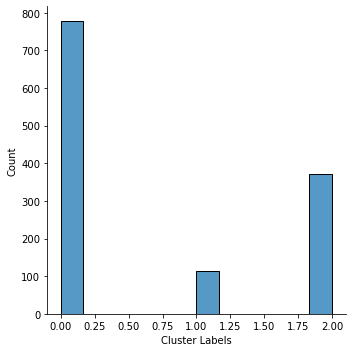

In [82]:
sns.displot(df_k_3["Cluster Labels"])